In [3]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

# 导入NumPy函数库，一般都是用这样的形式(包括别名np，几乎是约定俗成的)
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.optimize import leastsq
from scipy import stats
import scipy.optimize as opt
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
#from scipy.interpolate import CubicSpline
import math
import seaborn
import scipy
print scipy.__version__
#we can check the version by import.__version__

0.16.0


In [4]:
# 1.使用array创建
#  通过array函数传递list对象
L = [1, 2, 3, 4, 5, 6]
print "L = ", L
a = np.array(L)
print "a = ", a
print type(a)
# # 若传递的是多层嵌套的list，将创建多维数组
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print b

L =  [1, 2, 3, 4, 5, 6]
a =  [1 2 3 4 5 6]
<type 'numpy.ndarray'>
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [5]:
# # # 数组大小可以通过其shape属性获得
print a.shape
print b.shape

(6L,)
(3L, 4L)


In [7]:
# # 也可以强制修改shape
b.shape = (4, 3)
print b
# # # 注：从(3,4)改为(4,3)并不是对数组进行转置，而只是改变每个轴的大小，数组元素在内存中的位置并没有改变
# #
# # 当某个轴为-1时，将根据数组元素的个数自动计算此轴的长度
b.shape = 2, -1
print type(b.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
<type 'tuple'>


In [20]:
print b.shape
# #
b.shape = [3, 4]
# # 使用reshape方法，可以创建改变了尺寸的新数组，原数组的shape保持不变
c = b.reshape((4, -1))
print "b = \n", b
print 'c = \n', c

(3L, 4L)
b = 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
c = 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [21]:
# # 数组b和c共享内存，修改任意一个将影响另外一个
b[0][1] = 20
print "b = \n", b
print "c = \n", c

b = 
[[ 1 20  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
c = 
[[ 1 20  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [23]:
# # 数组的元素类型可以通过dtype属性获得
print a.dtype
print b.dtype

int32
int32


In [28]:
# # # 可以通过dtype参数在创建时指定元素类型
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.float)
f = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.complex)
print d
print f

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
[[  1.+0.j   2.+0.j   3.+0.j   4.+0.j]
 [  5.+0.j   6.+0.j   7.+0.j   8.+0.j]
 [  9.+0.j  10.+0.j  11.+0.j  12.+0.j]]


In [29]:
# # 如果更改元素类型，可以使用astype安全的转换
print d
f = d.astype(np.int)
print f
#
# # 但不要强制仅修改元素类型，如下面这句，将会以int来解释单精度float类型
d.dtype = np.int
print d

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[         0 1072693248          0 1073741824          0 1074266112
           0 1074790400]
 [         0 1075052544          0 1075314688          0 1075576832
           0 1075838976]
 [         0 1075970048          0 1076101120          0 1076232192
           0 1076363264]]


In [30]:
a = np.arange(1, 10, 0.5)
print a
# #
# # linspace函数通过指定起始值、终止值和元素个数来创建数组，缺省包括终止值
b = np.linspace(1, 10, 10)
print 'b = ', b
# #
# 可以通过endpoint关键字指定是否包括终值
c = np.linspace(1, 10, 10, endpoint=False)
print 'c = ', c

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.
  8.5  9.   9.5]
b =  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
c =  [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1]


In [32]:
# 和linspace类似，logspace可以创建等比数列
# 下面函数创建起始值为10^1，终止值为10^2，有10个数的等比数列
d = np.logspace(1, 2, 9, endpoint=True)
print d
# #
# # 下面创建起始值为2^0，终止值为2^10(包括)，有10个数的等比数列
f = np.logspace(0, 10, 11, endpoint=True, base=2)
print f

[  10.           13.33521432   17.7827941    23.71373706   31.6227766
   42.16965034   56.23413252   74.98942093  100.        ]
[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
   1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02
   2.56000000e+02   5.12000000e+02   1.02400000e+03]


In [33]:
# # 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s = 'abcd'
g = np.fromstring(s, dtype=np.int8)
print g

[ 97  98  99 100]


In [35]:
a = np.arange(10)
print a
# # 获取某个元素
print a[3]
# # # 切片[3,6)，左闭右开
print a[3:6]
# # # 省略开始下标，表示从0开始
print a[:5]
# # # 下标为负表示从后向前数
print a[3:]
# # # 步长为2
print a[1:9:2]
# # # 步长为-1，即翻转
print a[::-1]
# # # 切片数据是原数组的一个视图，与原数组共享内容空间，可以直接修改元素值
a[1:4] = 10, 20, 30
print a
# # # 因此，在实践中，切实注意原始数据是否被破坏，如：

[0 1 2 3 4 5 6 7 8 9]
3
[3 4 5]
[0 1 2 3 4]
[3 4 5 6 7 8 9]
[1 3 5 7]
[9 8 7 6 5 4 3 2 1 0]
[ 0 10 20 30  4  5  6  7  8  9]


In [36]:
b = a[2:5]
b[0] = 200
print a

[  0  10 200  30   4   5   6   7   8   9]


In [37]:
a = np.logspace(0, 9, 10, base=2)
print a
i = np.arange(0, 10, 2)
print i
# # # 利用i取a中的元素
b = a[i]
print b
# # b的元素更改，a中元素不受影响
b[2] = 1.6
print b
print a


[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]
[0 2 4 6 8]
[   1.    4.   16.   64.  256.]
[   1.     4.     1.6   64.   256. ]
[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [40]:
# 生成10个满足[0,1)中均匀分布的随机数
a = np.random.rand(10)
print a
# # 大于0.5的元素索引
print a > 0.5
# # # 大于0.5的元素
b = a[a > 0.5]
print b
# # # 将原数组中大于0.5的元素截取成0.5
a[a > 0.5] = 0.5
print a
# # # b不受影响
print b

[ 0.79041432  0.2111665   0.65494138  0.56334118  0.1090475   0.4718729
  0.73931841  0.09908562  0.86436191  0.85903348]
[ True False  True  True False False  True False  True  True]
[ 0.79041432  0.65494138  0.56334118  0.73931841  0.86436191  0.85903348]
[ 0.5         0.2111665   0.5         0.5         0.1090475   0.4718729
  0.5         0.09908562  0.5         0.5       ]
[ 0.79041432  0.65494138  0.56334118  0.73931841  0.86436191  0.85903348]


In [41]:
a = np.arange(0, 60, 10)    # 行向量
print 'a = ', a
b = a.reshape((-1, 1))      # 转换成列向量
print b
c = np.arange(6)
print c
f = b + c   # 行 + 列
print f

a =  [ 0 10 20 30 40 50]
[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
[0 1 2 3 4 5]
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [42]:
# 合并上述代码：
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print a
# 二维数组的切片
print a[[0, 1, 2], [2 ,3, 4]]
print a[4, [2, 3, 4]]
print a[4:, [2, 3, 4]]
i = np.array([True, False, True, False, False, True])
print a[i]
print a[i, 3]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[ 2 13 24]
[42 43 44]
[[42 43 44]
 [52 53 54]]
[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 3 23 53]


In [48]:
for j in np.logspace(0, 7, 10):
    j = int(j)
    x = np.linspace(0, 10, j)
    start = time.clock()
    y = np.sin(x)
    t1 = time.clock() - start

    x = x.tolist()
    start = time.clock()
    for i, t in enumerate(x):
        x[i] = math.sin(t)
    t2 = time.clock() - start
    print j, ": ", t1, t2, t2/t1


1 :  1.24019444538e-05 1.15466379398e-05 0.931034482759
5 :  0.000372485986872 1.41125574819e-05 0.0378874856487
35 :  5.55949234137e-06 1.92443965663e-05 3.46153846154
215 :  1.15466379398e-05 0.000100498515402 8.7037037037
1291 :  3.80611398755e-05 0.000580325469788 15.2471910112
7742 :  0.000210833055715 0.00378858020402 17.9695740365
46415 :  0.00139543257768 0.0216157338765 15.4903463071
278255 :  0.0128753566094 0.139803270949 10.8582057329
1668100 :  0.0524580867734 0.779869762477 14.8665307953
10000000 :  0.302965818103 4.66817528481 15.408257321


In [52]:
#4.2.1直接使用库函数
a = np.array((1, 2, 3, 4, 5, 5, 7, 3, 2, 2, 8, 8))
print '原始数组：', a
# 使用库函数unique
b = np.unique(a)
print '去重后：', b
# 4.2.2 二维数组的去重，结果会是预期的么？
c = np.array(((1, 2), (3, 4), (5, 6), (1, 3), (3, 4), (7, 6)))
print '二维数组', c
print '去重后：', np.unique(c)


原始数组： [1 2 3 4 5 5 7 3 2 2 8 8]
去重后： [1 2 3 4 5 7 8]
二维数组 [[1 2]
 [3 4]
 [5 6]
 [1 3]
 [3 4]
 [7 6]]
去重后： [1 2 3 4 5 6 7]


In [53]:
# 4.2.3 方案1：转换为虚数
# r, i = np.split(c, (1, ), axis=1)
# x = r + i * 1j
x = c[:, 0] + c[:, 1] * 1j
print '转换成虚数：', x
print '虚数去重后：', np.unique(x)
print np.unique(x, return_index=True)   # 思考return_index的意义
idx = np.unique(x, return_index=True)[1]
print '二维数组去重：\n', c[idx]
# 4.2.3 方案2：利用set
print '去重方案2：\n', np.array(list(set([tuple(t) for t in c])))

转换成虚数： [ 1.+2.j  3.+4.j  5.+6.j  1.+3.j  3.+4.j  7.+6.j]
虚数去重后： [ 1.+2.j  1.+3.j  3.+4.j  5.+6.j  7.+6.j]
(array([ 1.+2.j,  1.+3.j,  3.+4.j,  5.+6.j,  7.+6.j]), array([0, 3, 1, 2, 5], dtype=int64))
二维数组去重：
[[1 2]
 [1 3]
 [3 4]
 [5 6]
 [7 6]]
去重方案2：
[[1 2]
 [5 6]
 [7 6]
 [1 3]
 [3 4]]


In [54]:
a = np.arange(1, 10).reshape((3, 3))
b = np.arange(11, 20).reshape((3, 3))
c = np.arange(101, 110).reshape((3, 3))
print 'a = \n', a
print 'b = \n', b
print 'c = \n', c
print 'axis = 0 \n', np.stack((a, b, c), axis=0)
print 'axis = 1 \n', np.stack((a, b, c), axis=1)
print 'axis = 2 \n', np.stack((a, b, c), axis=2)

a = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
[[11 12 13]
 [14 15 16]
 [17 18 19]]
c = 
[[101 102 103]
 [104 105 106]
 [107 108 109]]
axis = 0 
[[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]
axis = 1 
[[[  1   2   3]
  [ 11  12  13]
  [101 102 103]]

 [[  4   5   6]
  [ 14  15  16]
  [104 105 106]]

 [[  7   8   9]
  [ 17  18  19]
  [107 108 109]]]
axis = 2 
[[[  1  11 101]
  [  2  12 102]
  [  3  13 103]]

 [[  4  14 104]
  [  5  15 105]
  [  6  16 106]]

 [[  7  17 107]
  [  8  18 108]
  [  9  19 109]]]


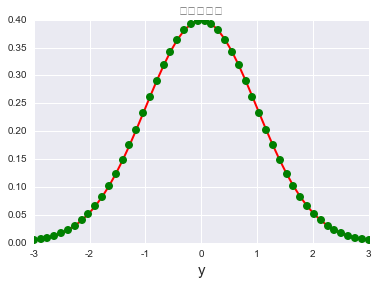

In [75]:
# -*- coding:utf-8 -*-
mpl.rcParams['font.sans-serif'] = [u'SimHei']  #FangSong/黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline
mu = 0
sigma = 1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 50)
y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
plt.figure(facecolor='w')
plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)
# r- and go means red line green o 
plt.grid(True)
plt.xlabel('x',fontsize=15)
plt.xlabel('y',fontsize=15)
#plt.title('Guass')
plt.title(u"高斯分布图")
plt.show()

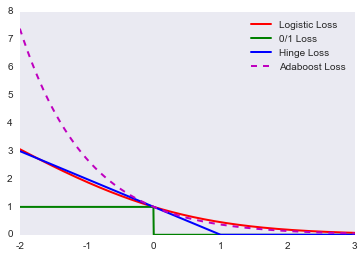

In [76]:
x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
plt.grid()
plt.legend(loc='upper right')
# plt.savefig('1.png')
plt.show()

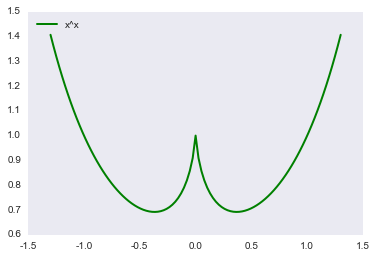

In [79]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

x = np.linspace(-1.3, 1.3, 101)
y = f(x)
plt.plot(x, y, 'g-', label='x^x', linewidth=2)
plt.grid()
plt.legend(loc='upper left')
plt.show()


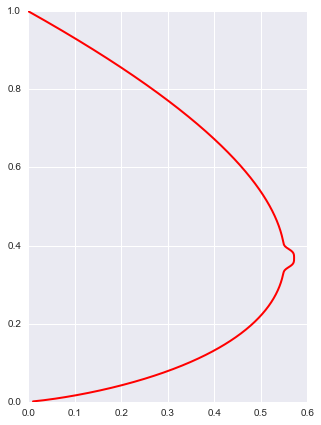

In [80]:
x = np.arange(1, 0, -0.001)
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
plt.figure(figsize=(5,7))
plt.plot(y, x, 'r-', linewidth=2)
plt.grid(True)
plt.show()

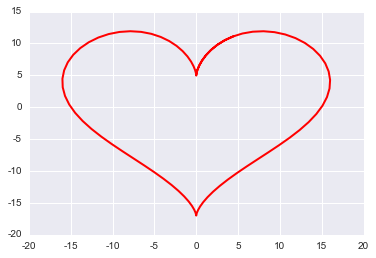

In [81]:
t = np.linspace(0, 7, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid(True)
plt.show()


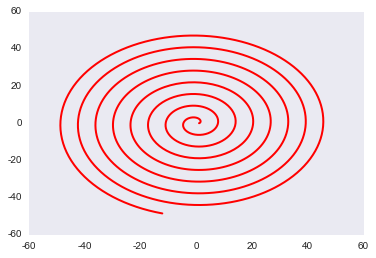

In [82]:
t = np.linspace(0, 50, num=1000)
x = t*np.sin(t) + np.cos(t)
y = np.sin(t) - t*np.cos(t)
plt.plot(x, y, 'r-', linewidth=2)
plt.grid()
plt.show()

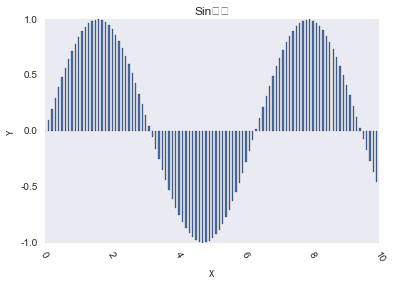

In [90]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']  #黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.bar(x, y, width=0.04, linewidth=0.2)
#plt.plot(x, y, 'r--', linewidth=2)
#-- means spotted line
plt.title(u'Sin曲线')
plt.xticks(rotation=-60)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [9]:
__name__

'__main__'